# Processamento dos ficheiros originais `qualar`

Os ficheiros resultantes da descarga da informação do site qualar (https://qualar.apambiente.pt) estão organizados tal como se mostra na figura.
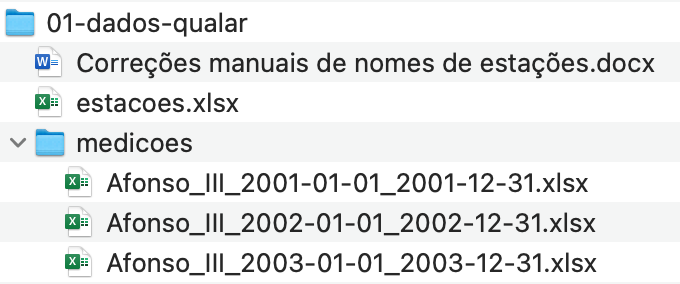

O ficheiro word não é necessário e apenas indica quais as correcções manuais que foram necessárias serem feitas pois algumas estacões de medição de poluente mudaram de nome ao logo do tempo.

O ficheiro estações.xlsx contem uma linha por estação com a informação seguinte: Estação, Região, Concelho, Tipo de Estação, Tipo de Área, Latitude,  Longitude e Altitude

 Os ficheiros das medições, vem em formato excel, um por ano e por estação. 
A primeira linha da única folha desses ficheiros são: 
. Nome da estação (sendo que por baixo estão a data e hora da leitura)
. Dióxido de Enxofre (µg/m3)
. Partículas < 10 µm (µg/m3)
. Ozono (µg/m3)
. Dióxido de Azoto (µg/m3)
. Monóxido de Carbono (mg/m3)
. Benzeno (µg/m3)
. Partículas < 2.5 µm (µg/m3)

Como cada ficheiro corresponde às leituras de cada hora ao longo e um ano, existem 24 x 365 = 8760 linhas (nos anos não bisceistos) 

O objectivo desta fase do processamento é ler os ficheiros todos para um dataframe e escrever-lo, em formato csv, numa directoria “02-dados-qualar-integrados” com o nome “02-medicoes-um-ficheiro”.

Copie (pode ser manualmente) o ficheiro de estações para essa mesma pasta., ficando assim:

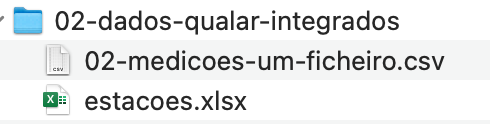

## Inicialização

In [1]:
import os as mac
import pandas as pd

C:\Users\guilh\AppData\Local\Temp\ipykernel_9284\3278047199.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Função que lê um ficheiro, extrai o nome da estação, adiconando-o como coluna, e devolve o Dataframe respetivo

def ler_estação(caminho_ficheiro):

    df1=pd.read_excel(caminho_ficheiro)
    nome_estação=df1.columns[0]
    df1.set_index(nome_estação, inplace=True)
    df1['estacao']= nome_estação
    return df1



In [3]:
# Diretoria onde os dados estão localizados
dir_original_files = './01-dados-qualar/medicoes'

# Directoria onde vamos guardar os resultados 
dir_destination = './02-dados-qualar-integrados/'

## Processamento

In [4]:
# Lista para guardar o Dataframes de cada ficheiro de dados
dfs = []

# Processar cada ficheiro usando a função definida anteriormente, adicionando o resultado à lista
for nome_estação in mac.listdir("01-dados-qualar/medicoes/"):
     df=ler_estação(f"01-dados-qualar/medicoes/{nome_estação}")
     dfs.append(df)
    
# Concatenar todos os Dataframes em um
df3=pd.concat(dfs, axis=0)
# Conferir o resultado
df3

,Dióxido de Enxofre (µg/m3),Partículas < 10 µm (µg/m3),Ozono (µg/m3),Dióxido de Azoto (µg/m3),Monóxido de Carbono (mg/m3),Benzeno (µg/m3),Partículas < 2.5 µm (µg/m3),estacao
2001-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afonso III
2001-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afonso III
2001-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afonso III
2001-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afonso III
2001-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afonso III
...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,4.0,27.0,59.0,2.0,NaN,NaN,NaN,Ílhavo
2022-12-31 20:00:00,2.2,26.0,57.0,2.0,NaN,NaN,NaN,Ílhavo
2022-12-31 21:00:00,0.8,28.0,55.0,2.0,NaN,NaN,NaN,Ílhavo
2022-12-31 22:00:00,0.5,30.0,55.0,2.0,NaN,NaN,NaN,Ílhavo


## Output

In [5]:
# Guardar o dataframe final num ficheiro csv, no diretório definido anteriormente
df3.to_csv('./02-dados-qualar-integrados/02-medicoes-um-ficheiro.csv', index=True)